In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

In [2]:
train_raw_df = pd.read_csv('train.csv')
train_raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_raw_df = pd.read_csv('test.csv')
test_raw_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_raw_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:xlabel='Survived', ylabel='count'>

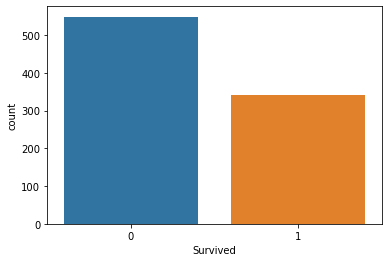

In [5]:
sns.countplot(x='Survived',data=train_raw_df)

# insights
1. we can see that count of people who survived is less and who died is more

<AxesSubplot:xlabel='Survived', ylabel='count'>

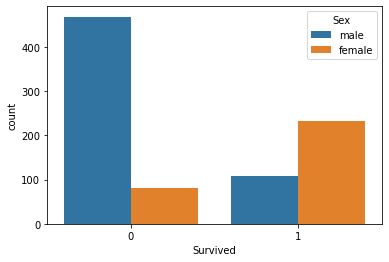

In [6]:
sns.countplot(x='Survived',hue='Sex',data=train_raw_df)

# insights
1.from the above plot it can be said that number of male who survived is comparatively less than female .

2.it can be said that the number of female who died is very very less than the number of male

<AxesSubplot:xlabel='Survived', ylabel='count'>

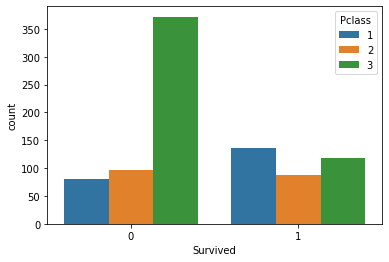

In [7]:
sns.countplot(x='Survived',hue='Pclass',data=train_raw_df)

# insights
1. from the above plot it can be concluded that number of Pclass 1 passangers who survived is more and died is less in comparison of other two classes.
2. it can also be said that passangers of class 3 died in more number.

### from the above 3 countplots it can be mantioned that the passangers who belong to Pclass 1 and are female are more likely to survive

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

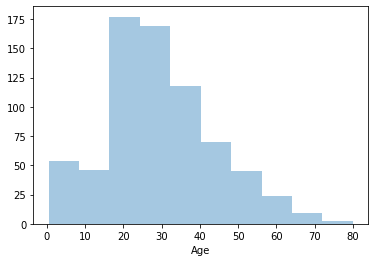

In [8]:
sns.distplot(train_raw_df['Age'],hist=True,kde=False,bins = 10)

# insights
1. It's a Gaussian distribution that is the most values are centred about single value that is 25-26.
2. Most of the passangers belong to the 20-30 age group including some outliers

<AxesSubplot:xlabel='SibSp', ylabel='count'>

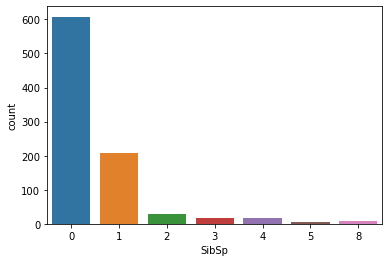

In [9]:
sns.countplot(x='SibSp',data=train_raw_df)

# insights
1. Maximum passangers were there without siblings or spouse 
2. although some were there with siblings+spouse as well

<AxesSubplot:>

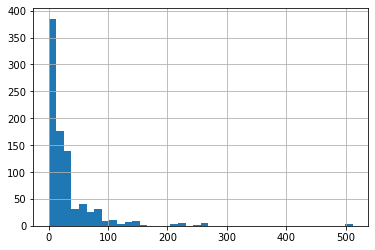

In [10]:
train_raw_df['Fare'].hist(bins=40,grid=True)

# insights
1. A large part of fare is between 0 to 90

<AxesSubplot:>

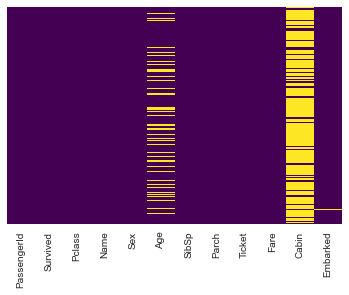

In [11]:
sns.set_style('whitegrid')
sns.heatmap(train_raw_df.isnull(),yticklabels = False , cmap='viridis',cbar = False)

# insights
1. we can clearly see that about 20% of age data is missing and we can handle it logically
2. But it is also true that most of the values of the feature Cabin is missing , i will prefer to drop it

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

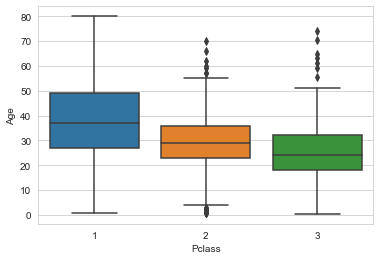

In [12]:
# lets check the relation between different pclass and age group
sns.boxplot(x='Pclass',y='Age',data = train_raw_df)


In [13]:
# p1(31),p2(29),p3(25)
def imputeAge(cols):
    Age = cols[0]
    Pclass = cols[1]
        
    if pd.isnull(Age):
        if Pclass == 1:
            return 31
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age


In [14]:
train_raw_df['Age']=train_raw_df[['Age','Pclass']].apply(imputeAge,axis=1)


In [15]:
train_raw_df.Age.isnull().sum()

0

<AxesSubplot:>

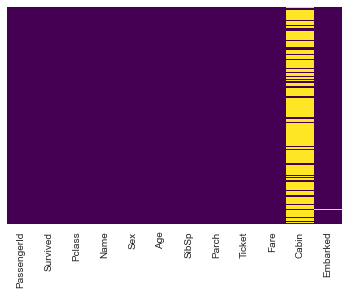

In [16]:
sns.set_style('whitegrid')
sns.heatmap(train_raw_df.isnull(),yticklabels = False , cmap='viridis',cbar = False)

In [17]:
train_raw_df.drop(['Name','Ticket','PassengerId','Cabin'],axis = 1,inplace=True)

In [18]:
train_raw_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
cat_col = train_raw_df.select_dtypes(include='object').columns.tolist()

In [20]:
cat_col

['Sex', 'Embarked']

In [21]:
sex = pd.get_dummies(train_raw_df['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [22]:
embarked = pd.get_dummies(train_raw_df['Embarked'],drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [23]:
train_raw_df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [24]:
train_df=pd.concat([train_raw_df,sex,embarked],axis = 1)

In [25]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [26]:
train_input_df = train_df[train_df.columns[1:]]
train_input_df

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,25.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [27]:
target = train_df['Survived']

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression(solver='liblinear')

In [30]:
model.fit(train_input_df,target)

LogisticRegression(solver='liblinear')

In [31]:
prediction = model.predict(train_input_df)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy = accuracy_score(target,prediction)

In [34]:
accuracy

0.8035914702581369

In [35]:
def rmse(target,prediction):
    return np.sqrt(np.mean(np.square(target-prediction)))

In [36]:
rmse(prediction,target)

0.4431800195652587

In [37]:

def imputeAge(cols):
    Age = cols[0]
    Pclass = cols[1]
        
    if pd.isnull(Age):
        if Pclass == 1:
            return 31
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age


In [38]:
test_raw_df['Age']=test_raw_df[['Age','Pclass']].apply(imputeAge,axis=1)

In [39]:
test_raw_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
test_raw_df.drop(['Name','Ticket','PassengerId','Cabin'],axis=1,inplace=True)

In [41]:
sex = pd.get_dummies(test_raw_df['Sex'],drop_first = True)
sex

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [42]:
embarked = pd.get_dummies(test_raw_df['Embarked'],drop_first = True)
embarked

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


In [43]:
test_raw_df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [44]:
test_df = pd.concat([test_raw_df,sex,embarked],axis=1)

In [45]:
test_df

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,25.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,25.0,0,0,8.0500,1,0,1


In [46]:
test_raw_df.isnull()

,Pclass,Age,SibSp,Parch,Fare
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
413,False,False,False,False,False
414,False,False,False,False,False
415,False,False,False,False,False
416,False,False,False,False,False


<AxesSubplot:>

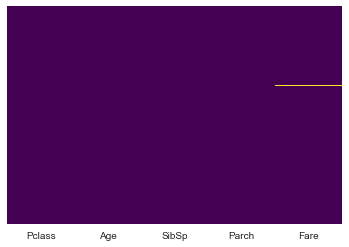

In [47]:
sns.heatmap(test_raw_df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [48]:
test_df.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      1
male      0
Q         0
S         0
dtype: int64

In [49]:
m = test_df.Fare.mean()


In [50]:
test_df['Fare'].replace(np.nan , m ,inplace = True)

In [51]:
train_input_df.shape

(891, 8)

In [52]:
test_df.shape

(418, 8)

In [53]:
test_df.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
male      0
Q         0
S         0
dtype: int64

In [54]:
target.shape

(891,)

In [55]:
predict2 = model.predict(test_df)

In [56]:
accuracy2 = accuracy_score(predict2 , target[255:673])

In [57]:
accuracy2

0.5382775119617225

In [58]:
passanger1 = {'Pclass':[1],'Age':[30],'SibSp':[0],'Parch':[0],'Fare':[400],'male':[0],'Q':[1],'S':[0]}

In [59]:
passanger_df = pd.DataFrame(data = passanger1)

In [60]:
passanger_df

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,30,0,0,400,0,1,0


In [61]:
a = model.predict(passanger_df)

In [62]:
a

array([1], dtype=int64)